<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import the existing folder on your Drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **2. Import libraries that will be used**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import math
import os
import glob

## **3. Make an image histogram (Use image lena.jpg)**

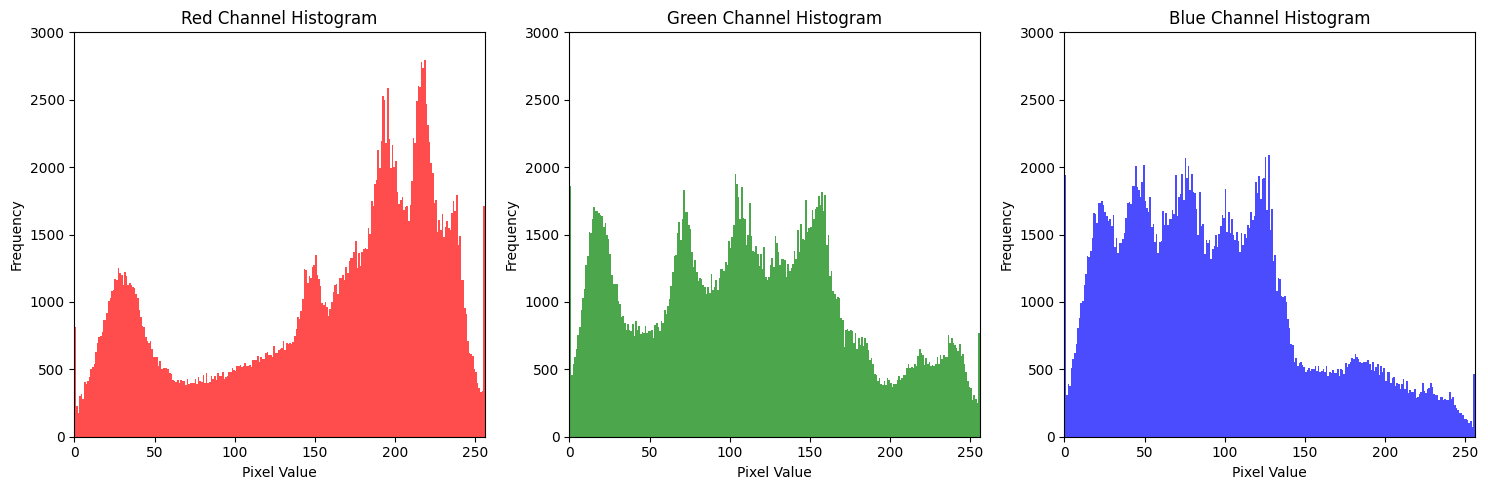

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Swap the red and blue channels
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Define channel names and colors
channel_info = [('Red', 'red'), ('Green', 'green'), ('Blue', 'blue')]

# Create subplots for each channel
plt.figure(figsize=(15, 5))

for i, (channel_name, color) in enumerate(channel_info):
    plt.subplot(131 + i)
    plt.title(f'{channel_name} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    if i == 0:
        channel = r
    elif i == 1:
        channel = g
    elif i == 2:
        channel = b
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])
    plt.hist(channel.ravel(), bins=256, range=[0, 256], color=color, alpha=0.7)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])
plt.tight_layout()
plt.show()

## **4. make the same image histogram but use the library that is owned by NumPy, namely "histogram". Compare the results. Does the output appear the same?**

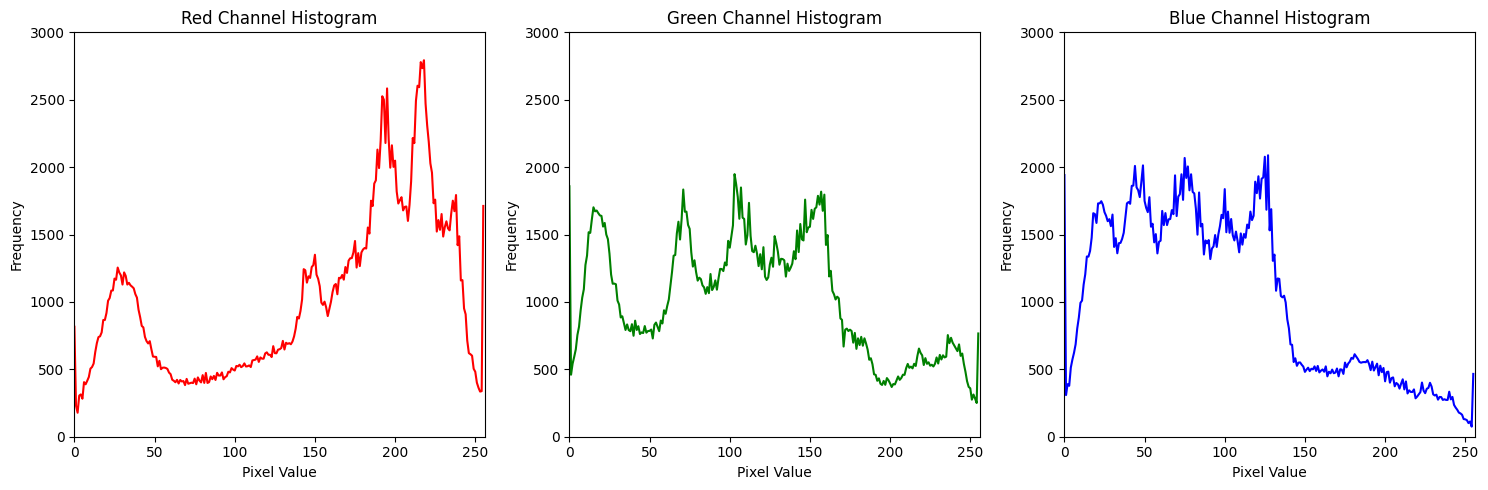

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Swap the red and blue channels
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Define channel names and colors
channel_info = [('Red', 'red'), ('Green', 'green'), ('Blue', 'blue')]

# Create subplots for each channel
plt.figure(figsize=(15, 5))

for i, (channel_name, color) in enumerate(channel_info):
    plt.subplot(131 + i)
    plt.title(f'{channel_name} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    if i == 0:
        channel = r
    elif i == 1:
        channel = g
    elif i == 2:
        channel = b
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])

plt.tight_layout()
plt.show()

## **5. Make an image histogram and also the image display before and after the following equalization histogram process  (Use image lena_lc .jpg)**

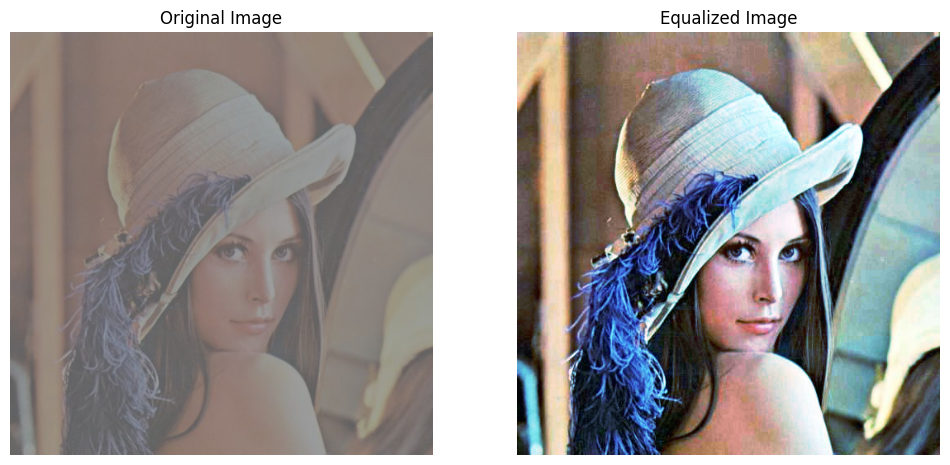

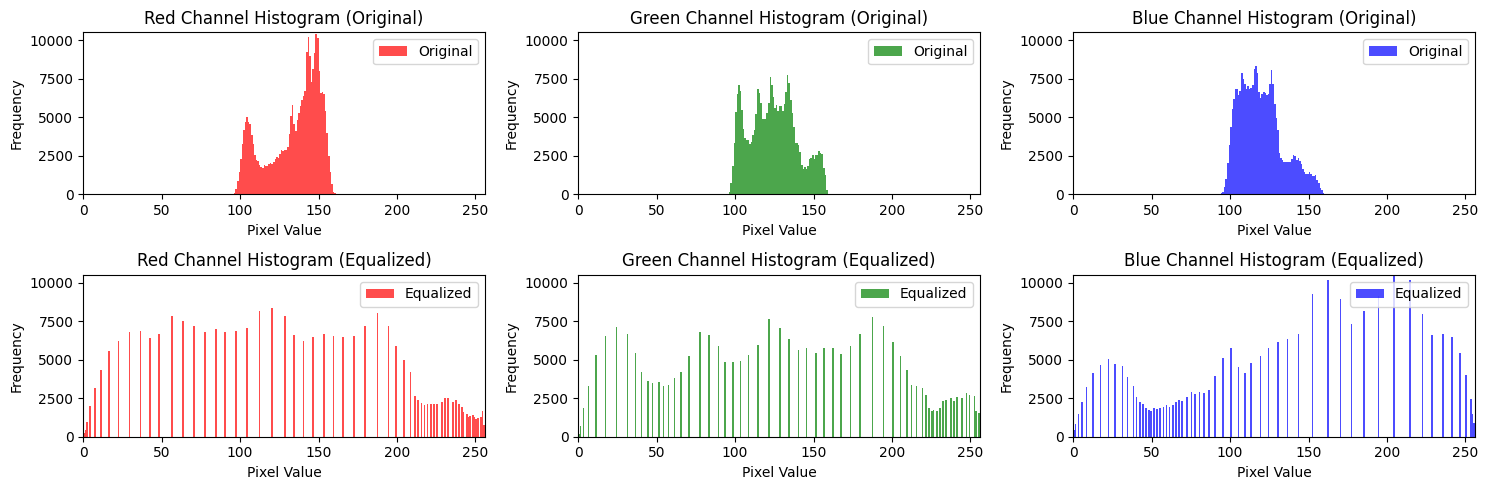

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Split the image into its color channels
b, g, r = cv2.split(img)

# Apply histogram equalization to each color channel
equalized_channels = [cv2.equalizeHist(channel) for channel in (b, g, r)]

# Create the equalized color image by merging the equalized channels
equalized_img = cv2.merge(equalized_channels)

# Display the original and equalized color images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Calculate and display the histograms of the original and equalized color channels
plt.figure(figsize=(15, 5))

channel_names = ('Red', 'Green', 'Blue')

for i, channel in enumerate((r, g, b)):
    plt.subplot(2, 3, i + 1)
    plt.hist(channel.ravel(), 256, [0, 256], color=channel_names[i][0].lower(), alpha=0.7, label='Original')
    plt.title(f'{channel_names[i]} Channel Histogram (Original)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 10500])  # Atur sumbu y hingga 10.500
    plt.legend(loc='upper right')

for i, channel in enumerate(equalized_channels):
    plt.subplot(2, 3, i + 4)
    plt.hist(channel.ravel(), 256, [0, 256], color=channel_names[i][0].lower(), alpha=0.7, label='Equalized')
    plt.title(f'{channel_names[i]} Channel Histogram (Equalized)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 10500])  # Atur sumbu y hingga 10.500
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **6. make the same image histogram but use the library owned by CV2, namely "equalizeHist". Compare the results. Does the output appear the same?**

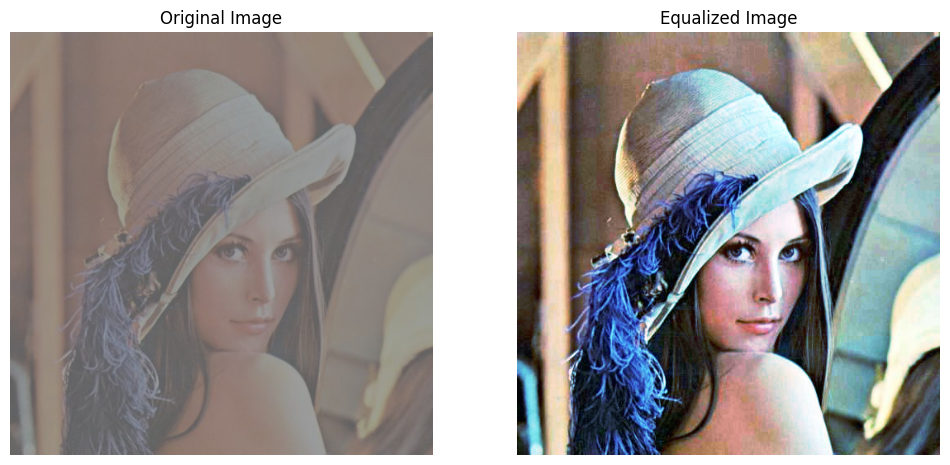

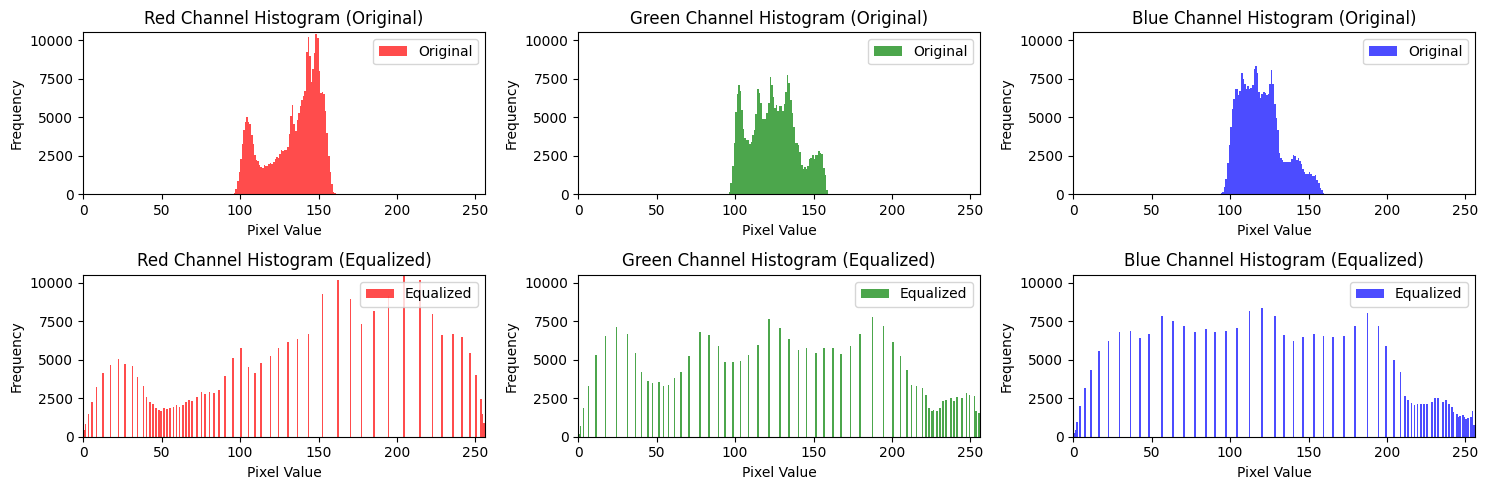

In [41]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Split the image into its color channels
b, g, r = cv2.split(img)

# Apply histogram equalization to each color channel
equalized_r = cv2.equalizeHist(r)
equalized_g = cv2.equalizeHist(g)
equalized_b = cv2.equalizeHist(b)

# Create the equalized color image by merging the equalized channels
equalized_img = cv2.merge([equalized_b, equalized_g, equalized_r])

# Display the original and equalized color images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Calculate and display the histograms of the original and equalized color channels
plt.figure(figsize=(15, 5))

channel_names = ('Red', 'Green', 'Blue')

for i, (channel, eq_channel) in enumerate(zip((r, g, b), (equalized_r, equalized_g, equalized_b))):
    plt.subplot(2, 3, i + 1)
    plt.hist(channel.ravel(), 256, [0, 256], color=channel_names[i][0].lower(), alpha=0.7, label='Original')
    plt.title(f'{channel_names[i]} Channel Histogram (Original)')
    plt.xlim([0, 256])
    plt.ylim([0, 10500])  # Adjust the y-axis limit to 10,500
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

for i, eq_channel in enumerate((equalized_r, equalized_g, equalized_b)):
    plt.subplot(2, 3, i + 4)
    plt.hist(eq_channel.ravel(), 256, [0, 256], color=channel_names[i][0].lower(), alpha=0.7, label='Equalized')
    plt.title(f'{channel_names[i]} Channel Histogram (Equalized)')
    plt.xlim([0, 256])
    plt.ylim([0, 10500])  # Adjust the y-axis limit to 10,500
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

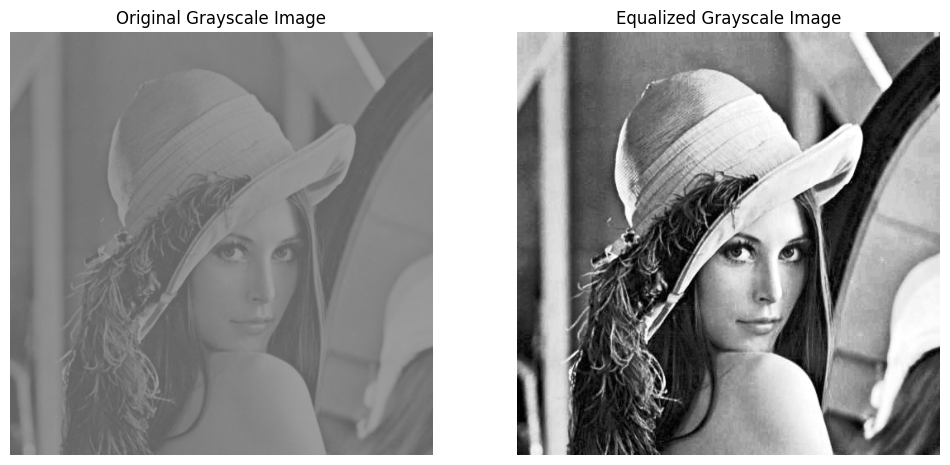

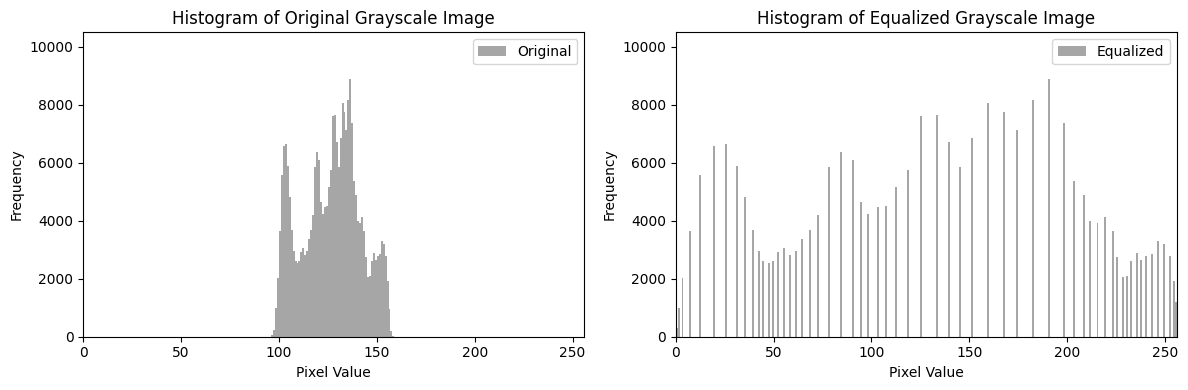

In [40]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization using OpenCV's equalizeHist
equalized_img = cv2.equalizeHist(gray_img)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

plt.show()

# Calculate and display the histograms of the original and equalized images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(gray_img.ravel(), 256, [0, 256], color='gray', alpha=0.7, label='Original')
plt.title('Histogram of Original Grayscale Image')
plt.xlim([0, 256])
plt.ylim([0, 10500])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(), 256, [0, 256], color='gray', alpha=0.7, label='Equalized')
plt.title('Histogram of Equalized Grayscale Image')
plt.xlim([0, 256])
plt.ylim([0, 10500])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black, green, yellow, blue, cyan, magenta, white  (Use the image testlena .jpg)**

## **8. Do the Floyd and Steinberg dithering process like the following output (initial image  display, and after dithering display) (Use wiki.jpg image)**